# Optimization for Data Science 2024 Homework 1

Students:

Alberto Calabrese Nº:2103405

Greta d'Amore Grelli Nº:2122424

Eleonora Mesaglio Nº:2103402

Marlon Helbing Nº:2106578

## 1. Generating the dataset

In [95]:
import numpy as np

# Set a seed for deterministic outputs
SEED = 0
np.random.seed(seed = SEED)

### A - MATRIX

In [96]:
NUM_SAMPLES = 1000
NUM_FEATURES = 1000

# Generate a 1000x1000 matrix with random samples from a standard normal distribution
# This is our data matrix, which contains 1000 samples (rows) with 1000 features each (columns)
# A MATRIX
data_matrix = np.random.normal(0, 1, size = (NUM_SAMPLES, NUM_FEATURES)) # He refers to it as A
A = data_matrix 
# Now 'data_matrix' contains random values drawn from N(0,1)


### X - MATRIX

In [97]:
NUM_LABELS = 50

# This is our weight matrix that we initialize like this ; these weights we want to learn
# it has 1000 features (rows) with 50 labels each (columns)
# X MATRIX
weight_matrix = np.random.normal(0, 1, size = (NUM_FEATURES, NUM_LABELS)) # He refers to it as X 
X = weight_matrix
print(X)

[[ 0.51424689  1.11286451  0.67502449 ...  0.25882336 -1.19061855
   0.33358561]
 [-1.81915062 -0.47212146 -0.34912377 ...  0.62585093 -0.65290049
   0.80570443]
 [-0.55865306 -0.0035541   0.24477089 ... -0.26494581 -0.44695689
  -1.48747178]
 ...
 [ 2.33758546 -0.84650435  0.79761719 ...  0.23849016  1.6671718
  -0.85339979]
 [ 1.03501666  0.69079556 -1.11256574 ...  0.08100798 -1.28175412
  -1.45574687]
 [-1.17802047 -0.58835553 -1.21609739 ... -0.39206131 -0.97551536
  -1.14216452]]


### E - MATRIX

In [98]:
NUM_EXAMPLES = 1000

# This matrix is used to help generating our supervised gold labels 
# It is of size 1000 training examples (rows) and their labels (columns)
generative_matrix = np.random.normal(0, 1, size = (NUM_EXAMPLES, NUM_LABELS)) # He refers to it as E 
E = generative_matrix

### AX + E

In [99]:
# Create a vector with numbers from 1 to 50
label_vector = np.arange(1, 51)

# Print the vector
#print(label_vector)

In [100]:
# Now he wants us to calculate AX+E to generate labels for the 1000 training examples (such that we have a supervised learning set) +

# Calculate the matrix product AX
AX = np.matmul(data_matrix, weight_matrix)  # or simply: AX = A @ X
print(AX)

# Add E to AX element-wise
result_matrix = AX + generative_matrix

print(result_matrix.shape)

[[ 28.37955025  12.44004627  74.53765602 ...   5.36347241  29.24640324
  -58.68832687]
 [-36.84008464  -1.55276569 -35.44585854 ...  10.0214222  -13.82201066
   -8.29253847]
 [ 28.64849189  -6.52245633 -31.13462845 ...  73.6132841  -10.96331242
  -53.34722266]
 ...
 [ 16.19559425  55.91715705  15.65062663 ... -15.05409478  35.96461763
   39.89412112]
 [ 30.58357539   2.84910196 -34.83950691 ...  -3.98929294  -9.25761593
   13.50727109]
 [ -7.68284097  20.49135152  30.88517547 ... -40.13266463  10.54610989
  -44.44748546]]
(1000, 50)


## 2. MAX INDEX AS CLASS LABEL

In [101]:
# We find our labels by considering the max index in the row as the class label

# Find the column indices of maximum values for each row
labels = np.argmax(result_matrix, axis=1)

print(labels)

#print(result_matrix[2,:])
print(labels.shape)

# 'max_indices' now contains the column indices of maximum values for each row

[ 2 38 47 33 24 35 22 18 30 49  2 42 23 22  0 29 47 40 30 13 32 23 36  9
 29 14  3 38  6 21 37  4 34 39 32 22 12  9 31 27 21 16 24  7 27 39 21 35
  8 39 25 27 48 48 46  6 46 37  1 49 27 46 11 25 47 49 24 45 28 27 48 37
 21 23  1  3 45 27 18  8 19 11 40 16 10 46  0 19 46 21 10 13 13 13 15 16
  7 22  8 14 12 49  8 43 21 17 45 24 17 19 23  3 10  6 10 12 17 29 48 48
 22 26  4 27 41 20 46 20 33 30 20 13 44 16 20 35 39  7 16 13 41 48 32 40
 44 14 41 37 43 46 48 30 34 38  8 15  9 16  9 23 31 15 27 11 36 25 27  2
 12 29 17 14 39 20 47 41 21 14 20 10 23  1 45  2 15 27  5 20 31 23 25 49
 33  4 46 31 27 27  6 45 27 30 40 39  9  5 33 32 46 49 41 41 40  7  0 26
 19 43 12  0 32 31 13 39 14 22 14 34  8 27  0 26 24 14 25 37 37 32 25 40
 11 39 15 25 39 47 17 49 27 25 41 42 25  2 31 49 16 48 38 20 25  4 47 18
 12 44 36  7  8 29 41 45 34  4 10 21 11 38 32 41 26 29 15  1 16  6 11 10
 17  3 43 36 22 23 11 24 34  0 32 24 18 45 16  3  5 15 25 17 16 20  0 17
 36 20 46 46  2 42 45 41 36 28 45 37 37 39 26 21 45

## Split Train/Test

In [115]:
A_train = A[0:800,:]
A_test = A[800:1000, :]

print(A_test.shape)
labels_train = labels[0:800]
labels_test = labels[800:1000]

(200, 1000)


## 3. Gradient Descent

In [8]:
# Define the negative log-likelihood function
def cost_func(data_matrix, weight_matrix, labels):
    scores = np.dot(data_matrix, weight_matrix)
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(NUM_EXAMPLES), labels])
    data_loss = np.sum(corect_logprobs)
    return data_loss


# Define the function to compute the gradient of the negative log-likelihood function
def gradient(data_matrix, weight_matrix, labels):
    scores = np.dot(data_matrix, weight_matrix)
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    probs[range(NUM_EXAMPLES), labels] -= 1
    dW = np.dot(data_matrix.T, probs)
    return dW

In [9]:
# Define the learning rate and the number of iterations
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for i in range(num_iterations):
    grad = gradient(data_matrix, weight_matrix, max_indices)
    weight_matrix -= learning_rate * grad

    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, cost_func(data_matrix, weight_matrix, max_indices)))

iteration 0: loss 4.146766
iteration 100: loss 0.207946
iteration 200: loss 0.116930
iteration 300: loss 0.082825
iteration 400: loss 0.064673
iteration 500: loss 0.053311
iteration 600: loss 0.045492
iteration 700: loss 0.039762
iteration 800: loss 0.035373
iteration 900: loss 0.031897


In [10]:
NUM_LABELED = 500
Y_0 = np.random.rand(NUM_SAMPLES, NUM_LABELS) # define an appropriate starting point
assert Y_0.shape == (NUM_SAMPLES, NUM_LABELS)

EPSILON = 1e-6 # define small epsilon for stopping criterion
MAX_ITER = 2000 # and/or a maximum number of iterations (or even a maximum time)

ALPHA = 0.01 # define a fixed stepsize

In [11]:
import time

Y_iterates = [Y_0]
times = [0]
start = time.time()

grad = gradient(data_matrix, weight_matrix, max_indices)
while len(Y_iterates) < MAX_ITER and np.linalg.norm(grad) > EPSILON: # TO DO: write the condition for the while loop
    new_y = Y_iterates[-1] - ALPHA * grad # write the update
    Y_iterates.append(new_y)
    times.append(time.time() - start)
    # Check the stopping criterion
    grad = gradient(data_matrix, weight_matrix, max_indices)


In [12]:
import matplotlib.pyplot as plt

plt.plot(times, [cost_func(data_matrix, weight_matrix, y.astype(int)) for y in Y_iterates])
plt.xlabel('CPU time (seconds)')
plt.ylabel('Objective function')
plt.yscale("log")
plt.show()

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (1000,) (1000,50) 

## 4. BCGD with Randomized Rule

We define as a block a single column in the parameter matrix $X$. Thus, one block defines all features for a single class. As this is a column vector in the matrix $X$, our partial gradient is now only dependent on $c$ (because we have a gradient for all the features of one class).


Our partial derivative for one block then looks like the following

\begin{equation}
\frac{\partial f(X)}{\partial X_{c}} = - A^{T} \cdot (L^{I} - Q) = A^{T} \cdot (- L^{I} + Q)
\end{equation}



where 

$A$ has form $m \times d$ ; it is our given matrix A.
\
$L^{I}$ has form $m \times 1$ ; it is the indicator vector containing $1$'s only at the positions where the label of the current sample $i$ is equal to $c$ and $0$'s everywhere else.
$$
L_{i}^{I}=\begin{cases}
			1 \quad & \text{if $label_{i} = c $}\\
            0 \quad & \text{otherwise}
		 \end{cases}
$$
\
$Q$ has form $m \times 1$ ; it is the vector calculating the exponential expression $\dfrac{\exp(x_{c}^{T}a_{i})}{\sum_{c' = 1}^{k} \exp(x_{c'}^{T}a_{i}) }$ for each sample $i$

Thus, our result will be of form $d \times 1$

Note that the calculations needed for $L^{I}$ and $Q$ only depend on $c$ and $i$ . However, as we know all the samples $i$, we construct the vectors $L^{I}$ and $Q$ which are then only dependent on $c$ .



In [90]:
####### NOT TESTED YET ########
m = 1000 # samples
d = 1000 # features
k = 50   # labels

## Cost function 

In [68]:
def cost_function(X,A):
    # X_l is m x d, where each row is a column of X and depends on what label the sample has
    # for example, the first row of X_l is the column vector of matrix X at the index of the label that sample 1 has
    X_l = np.zeros((m,d))
    # Iterate over all labels and notice that we have a label for each sample, thus we can use idx directly
    for idx,label in enumerate(labels):
        X_l[idx,:] = X[:,label]

    # Make negative
    X_l = -1 * X_l
    # Now we have to manually calculate the double sum 
    final_sum = 0
    current = 1 # initial so np.log(1) = 0
    for sample_idx in range(m):
        final_sum += np.log(current)
        current = 0 # so we have the correct start value
        for label_idx in range(k):
            current += np.exp(np.dot((X[:,label_idx]).T, A[sample_idx,:]))

  
 
    return np.sum(np.einsum('ij,ji->i', X_l, A)) + final_sum

        







In [121]:
def cost_function_full(X,A):
    # This function is ugly but just for testing if we did smth wrong
    sum_1 = 0
    for sample_idx in range(m):
        # Take the column at index of the label of the current sample
        x_bi = X[:, labels[sample_idx]]
        x_bi = -1 * x_bi
        a_i = A[sample_idx, :]
        sum_1 += (x_bi @ a_i) # automatically calculates (1,1000) x (1000,1)
    sum_2 = 0
    for sample_idx in range(m):
        current = 0 # so we have the correct start value
        for label_idx in range(k):
            current += np.exp((X[:,label_idx]) @ A[sample_idx,:])
        sum_2 += np.log(current)

    return sum_1 + sum_2 

    





In [117]:
m = 1000 # samples
d = 1000 # features
k = 50   # labels

def partial_gradient(X,c):
    # We need X as parameter so it changes value across diff gradients

    # We define the partial gradient
    
    # Calculating indicator vector L 

    # Initialize empty L in size of all samples (=1000)
    L = np.zeros((m,1))

    # Iterate over labels of each sample
    for idx,label in enumerate(labels):
        # If there is a label match
        if label == c:
            # We assign a 1
            L[idx] = 1
        # If there is no match
        else:
            # We assign a 0
            L[idx] = 0

    # Calculating vector Q

    # Initialize empty Q in size of all samples (=1000)
    
    Q = np.zeros((m,1))

        
    # Iterate over all samples
    for curr_sample in range(m):
    
        nominator = np.exp((X[:,c]) @ (A[curr_sample,:]))
    
        denominator = 0
        # Iterate over all labels for the denominator
        for curr_label in range(k):
            denominator += np.exp((X[:,curr_label]) @ A[curr_sample,:])
    
       
        Q[curr_sample] = nominator/denominator



    return (np.dot(A.T, ((-1 * L) + Q))).squeeze() # returns (1000,)

    





    

    
    


In [118]:
def full_gradient(X):
    # initialize zero gradient of size (m,)
    grad = np.zeros(m)
    for label in range(k):
        grad = np.column_stack((grad, partial_gradient(X,label)))

  

    return grad[:,1:] #remove 0 column
        
        

(1000, 51)
(1000, 50)


In [127]:
import random
X_0 = X
# Calculate Loss in the beginning

for i in range(500): # 1000 iterations
    curr_c = random.randint(0,k-1)
    print("Current Loss : {}".format(cost_function_full(X_0, A)))
    # Gradient step

    X_0[:, curr_c] = X_0[:, curr_c] - 0.001 * partial_gradient(X_0,curr_c) 










Current Loss : 67.33816574211232
Current Loss : 66.8656036343018
Current Loss : 65.9793249854265
Current Loss : 65.53005148608645
Current Loss : 64.98676737524511
Current Loss : 64.41677674457605
Current Loss : 63.72506138010067
Current Loss : 63.392115071023
Current Loss : 63.23957716625591
Current Loss : 62.93268045304285
Current Loss : 62.11668297099823
Current Loss : 61.50239444996987
Current Loss : 61.38610857719323
Current Loss : 60.469223378473544
Current Loss : 60.093481244082795
Current Loss : 59.8803582911205
Current Loss : 59.668645929326885
Current Loss : 58.55592643730051
Current Loss : 56.925842263692175
Current Loss : 56.57033450152085
Current Loss : 56.41408288483217
Current Loss : 56.146999845062965
Current Loss : 55.83272924195626
Current Loss : 55.430736605019774
Current Loss : 55.293340426447685
Current Loss : 54.8427886415011
Current Loss : 54.4924072536669
Current Loss : 54.281784329446964
Current Loss : 53.75922115208232
Current Loss : 53.31010898106615
Current L

KeyboardInterrupt: 

## BCGD Gauss-Southwell

In [139]:
# We have to calculate the partial gradient of each block ; We calculate it in our partial_gradient function. Thus, we have to iterate over all possible blocks
# , which in our case are class - many, so k many 


def Gauss_Southwell(X):

    learning_rate = 0.01 # TODO : REPLACE BY LIPSCHITZ
    X_0 = X
    for it in range(20): # iterations
        
        all_partial_gradients = []
        for label_idx in range(k): # k is number of all labels
            # Calculate the partial gradient of each block
            all_partial_gradients.append(partial_gradient(X_0,label_idx))

        # Gradients will be of size (features,) so in our case (1000,) 
        all_partial_gradients_norms = [np.linalg.norm(curr_grad) for curr_grad in all_partial_gradients]

        
        max_idx = np.argmax(all_partial_gradients_norms)
   
    

        partial_grad = all_partial_gradients[max_idx]
      

        # Gradient Descent 
         
        print("Current Loss : {}".format(cost_function_full(X_0, A)))
        # Gradient step
        X_0[:, max_idx] = X_0[:, max_idx] - learning_rate * partial_grad




In [140]:
Gauss_Southwell(X)

Current Loss : 48.8254584602837
Current Loss : 44.60292529145954
Current Loss : 40.827469026946346


KeyboardInterrupt: 

Current Loss : 69.78012747403409
Current Loss : 39.52945970639121
Current Loss : 28.02260797996132
Current Loss : 22.274046466394793
Current Loss : 18.72851959388936
Current Loss : 16.28161745829857
Current Loss : 14.472780104231788
Current Loss : 13.071795664829551
Current Loss : 11.949352403433295
Current Loss : 11.026623155732523
Current Loss : 10.25254239696369
Current Loss : 9.592432513367385
Current Loss : 9.021840558067197
Current Loss : 8.522983455724898
Current Loss : 8.08259155297128
Current Loss : 7.690544687167858
Current Loss : 7.338978669780772
Current Loss : 7.021682103222702
Current Loss : 6.733678491043975
Current Loss : 6.470930076626246
Current Loss : 6.230123722096323
Current Loss : 6.008513320019119
Current Loss : 5.803801961854333
Current Loss : 5.614052559205447
Current Loss : 5.437619167350931
Current Loss : 5.273093592768419
Current Loss : 5.119263429616694
Current Loss : 4.9750787572265835
Current Loss : 4.839625467124279
Current Loss : 4.712103721889434
Curre

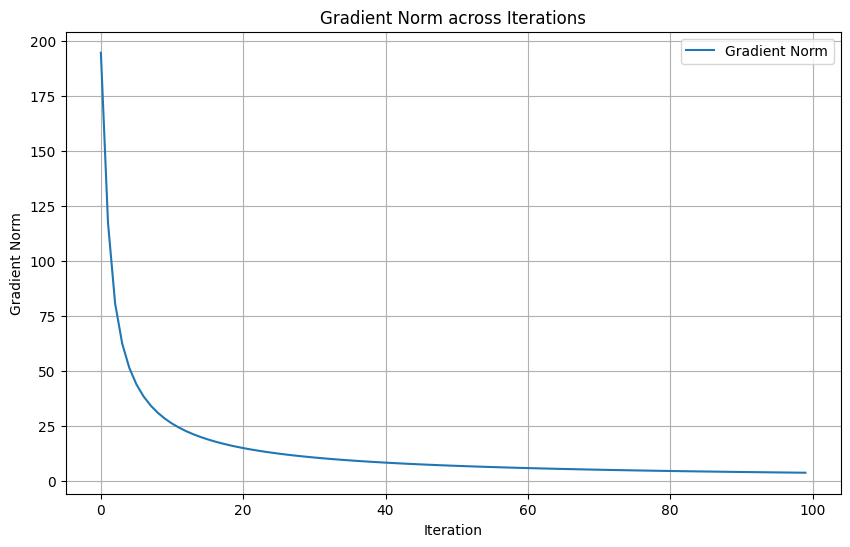

1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


X_0 = X
gradient_norms = []
for i in range(100): # 10 iterations
    print("Current Loss : {}".format(cost_function_full(X_0, A)))
    # Gradient step

    # Calculate current gradient
    gradient_at_i = full_gradient(X_0)
    # Calculate the norm
    gradient_norms.append(np.linalg.norm(gradient_at_i))
    # Gradient step
    X_0 = X_0 - 0.001 * gradient_at_i


# Create an array of iteration numbers
iterations = np.arange(len(gradient_norms))

# Create Gradient Norm Plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, gradient_norms, label='Gradient Norm')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm across Iterations')
plt.legend()
plt.grid(True)
plt.show()


# See how X_0 performs :

result_matrix_descent = A @ X_0


# Find the column indices of maximum values for each row
labels_descent = np.argmax(result_matrix_descent, axis=1)



equal_entries = labels == labels_descent

# Count the number of True values (equal entries)
num_equal_entries = np.sum(equal_entries)

# Accuracy :
accuracy = num_equal_entries / len(labels)

print(accuracy)

